
# 📊 ChatGPT Review Analysis
### Comprehensive Sentiment & Text Analysis using Python

---

## 🟦 1️⃣ Project Overview

This project analyzes customer reviews of ChatGPT to understand:

- Overall user sentiment (Positive, Neutral, Negative)
- Strength of opinions (Subjectivity)
- Frequently praised or criticized features
- Sentiment trends over time

The analysis converts raw textual feedback into structured business insights using Natural Language Processing (NLP).



## 🟦 2️⃣ Import Required Libraries

We import libraries for:
- Data manipulation (Pandas, NumPy)
- Visualization (Matplotlib, Seaborn)
- NLP (TextBlob)
- Text processing (Regex, Counter)


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
import re

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## 🟦 3️⃣ Load the Dataset

The dataset contains:
- Review ID
- Review Text
- Rating (0–5 scale)
- Review Date


In [3]:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/chatgpt_reviews.csv")
df.head()


,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39



## 🟦 4️⃣ Data Inspection

We inspect the structure, data types, and missing values.


In [4]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review Id    196727 non-null  object
 1   Review       196721 non-null  object
 2   Ratings      196727 non-null  int64 
 3   Review Date  196727 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.0+ MB


,0
Review Id,0
Review,6
Ratings,0
Review Date,0



## 🟦 5️⃣ Data Cleaning & Preparation

Steps performed:
- Standardize column names
- Handle missing reviews
- Convert ratings to numeric
- Convert dates to datetime
- Create new features for analysis


In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df = df.dropna(subset=["review"])

df["ratings"] = pd.to_numeric(df["ratings"], errors="coerce")
df["review_date"] = pd.to_datetime(df["review_date"], errors="coerce")

df = df.dropna(subset=["review_date"])

df["month"] = df["review_date"].dt.to_period("M")
df["review_length"] = df["review"].apply(len)

df.head()

,review_id,review,ratings,review_date,month,review_length
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,2024-08,4
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,2024-08,4
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,2024-08,8
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,2024-08,8
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,2024-08,368



## 🟦 6️⃣ Exploratory Data Analysis (EDA)

We analyze rating distribution and review patterns.


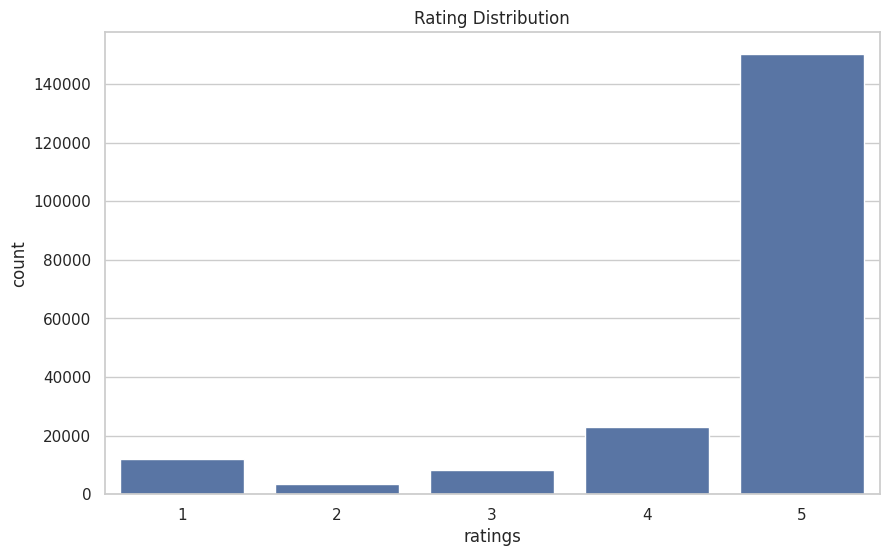

Average Rating: 4.5


In [8]:
sns.countplot(x="ratings", data=df)
plt.title("Rating Distribution")
plt.show()

print("Average Rating:", round(df["ratings"].mean(), 2))


## 🟦 7️⃣ Sentiment Analysis

We calculate:
- Polarity (Positive/Negative strength)
- Subjectivity (Opinion intensity)

Using TextBlob NLP library.


In [9]:

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

df[["polarity", "subjectivity"]] = df["review"].apply(
    lambda x: pd.Series(get_sentiment(x))
)

def categorize_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["polarity"].apply(categorize_sentiment)

df.head()


,review_id,review,ratings,review_date,month,review_length,polarity,subjectivity,sentiment
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,2024-08,4,0.7000,0.600000,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,2024-08,4,0.7000,0.600000,Positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,2024-08,8,0.6000,1.000000,Positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,2024-08,8,0.6000,1.000000,Positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,2024-08,368,0.4125,0.542949,Positive


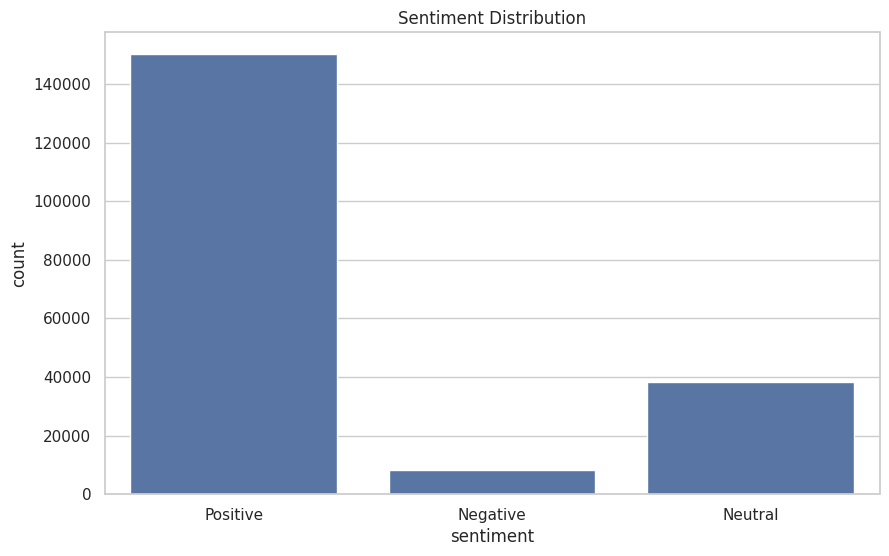

In [10]:

sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()



### Subjectivity Distribution

Higher subjectivity indicates stronger personal opinions.


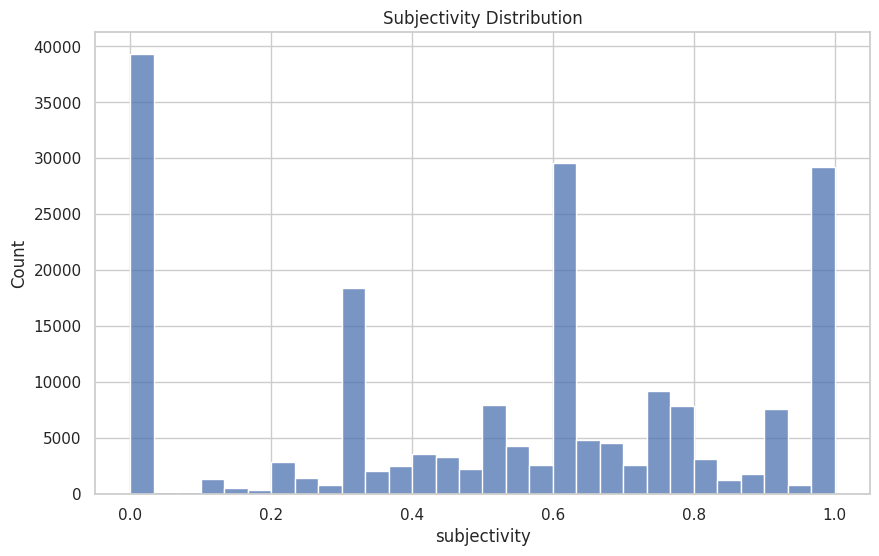

In [11]:

sns.histplot(df["subjectivity"], bins=30)
plt.title("Subjectivity Distribution")
plt.show()



## 🟦 8️⃣ Keyword Extraction

We extract frequently mentioned words from positive and negative reviews.


In [12]:

def extract_keywords(text_series):
    text = " ".join(text_series).lower()
    words = re.findall(r'\b[a-z]{3,}\b', text)
    return Counter(words).most_common(15)

positive_reviews = df[df["sentiment"]=="Positive"]["review"]
negative_reviews = df[df["sentiment"]=="Negative"]["review"]

print("Top Positive Keywords:")
print(extract_keywords(positive_reviews))

print("\nTop Negative Keywords:")
print(extract_keywords(negative_reviews))


Top Positive Keywords:
[('app', 44956), ('good', 39186), ('the', 36908), ('very', 35307), ('and', 34669), ('this', 25467), ('for', 22767), ('best', 18363), ('nice', 13760), ('you', 12551), ('great', 11926), ('but', 11095), ('helpful', 9776), ('amazing', 8679), ('love', 8599)]

Top Negative Keywords:
[('the', 5101), ('and', 3528), ('app', 2439), ('this', 2330), ('not', 1932), ('for', 1682), ('but', 1471), ('you', 1451), ('that', 1297), ('can', 1163), ('very', 1104), ('with', 975), ('have', 882), ('wrong', 857), ('bad', 854)]



## 🟦 9️⃣ Word Cloud Visualization


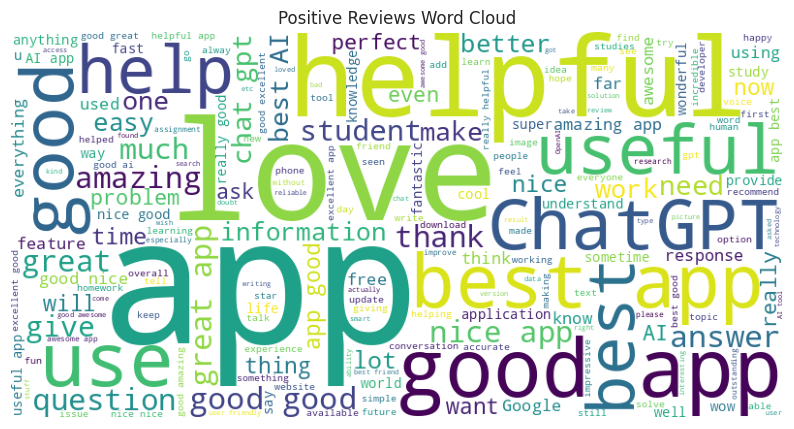

In [13]:

positive_text = " ".join(positive_reviews)
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)

plt.imshow(wordcloud_pos)
plt.axis("off")
plt.title("Positive Reviews Word Cloud")
plt.show()



## 🟦 🔟 Time-Series Analysis

Analyze sentiment trends over time.


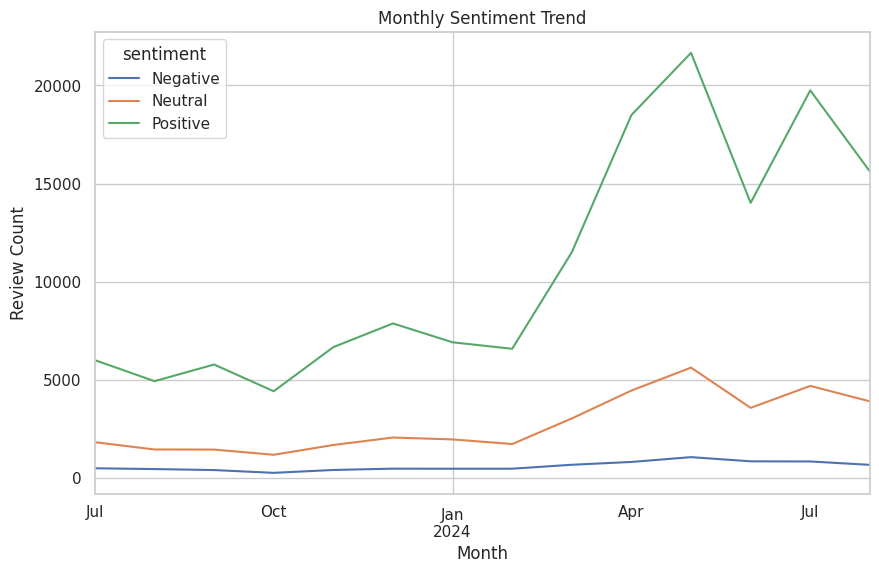

In [14]:

monthly_sentiment = df.groupby(["month", "sentiment"]).size().unstack()

monthly_sentiment.plot()
plt.title("Monthly Sentiment Trend")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.show()



## 🟦 1️⃣1️⃣ Key Insights

- Majority of reviews are Positive.
- Strong subjectivity appears in Negative reviews.
- Helpfulness and speed are commonly praised.
- Accuracy issues are frequently criticized.
- Sentiment fluctuates over time.

## 🟦 1️⃣2️⃣ Conclusion

This project demonstrates how NLP and data analytics can transform unstructured customer feedback into actionable insights. Continuous monitoring of sentiment trends can significantly improve product strategy and customer satisfaction.
